# Data Science Salaries EDA & Visualization

 In this notebook I am going to explore and visualize the dataset of (Data Science Salaries 2023 💸) from kaggle, the dataset contains salaries of different Data Science fields in the Data Science Domain.

## About the Dataset

**Data Science Job Salaries Dataset contains 11 columns, each are:**

 *work_year*: The year the salary was paid.

 *experience_level*: The experience level in the job during the year
* EN, refers to Entry-level / Junior.
* MI, refers to Mid-level / Intermediate.
* SE, refers to Senior-level / Expert.
* EX, refers to Executive-level / Director.


 *employment_type*: The type of employment for the role
* PT,refers to Part-time
* FT,refers to Full-time
* CT,refers to Contract
* FL,refers to Freelance


 *job_title*: The role worked in during the year.

 *salary*: The total gross salary amount paid.

 *salary_currency*: The currency of the salary paid as an ISO 4217 currency code.

 *salaryinusd*: The salary in USD

 *employee_residence*: Employee's primary country of residence in during the work year as an ISO 3166 country code.

 *remote_ratio*: The overall amount of work done remotely

 *company_location*: The country of the employer's main office or contracting branch

 *company_size*: The median number of people that worked for the company during the year

Let's begin by downloading the data, and listing the files within the dataset.

The dataset has been downloaded and extracted.

In [1]:
!pip install kaggle
!pip install chart_studio
!pip install plotly
!pip install tensorflow
!pip install pandas-profiling

     |████████████████████████████████| 63 kB 1.3 MB/s eta 0:00:011
     |████████████████████████████████| 78 kB 5.1 MB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77733 sha256=c7fc7485acd03d49e2763f7d69471830966f9f16c75b63b6a35a38ee0f688728
  Stored in directory: /Users/rijal/Library/Caches/pip/wheels/9c/45/15/6d6d116cd2539fb8f450d64b0aee4a480e5366bb11b42ac763
Successfully built kaggle
     |████████████████████████████████| 64 kB 1.4 MB/s eta 0:00:011
  Using cached tensorflow-2.13.0rc1-cp39-cp39-macosx_12_0_arm64.whl (2.0 kB)
     |████████████████████████████████| 189.3 MB 92 kB/s  eta 0:00:01�████▍      | 150.3 MB 2.0 MB/s eta 0:00:20�████████████████████▋      | 151.3 MB 2.0 MB/s eta 0:00:19     |████████████████████████████████| 188.7 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 7.5 MB/s eta 0:00:0101
     |████████████████████████████████| 57 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 24.3

In [ ]:
from numpy import array
from numpy import mean
from numpy import cov
import numpy as np
from numpy.linalg import eig
from pandas_profiling import ProfileReport
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
import time
import tensorflow as tf

<ipython-input-13-a8f9e70ca1e7>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
print(tf.__version__)

2.12.0


<h2>import data from kaggle</h2>

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download arnabchaki/data-science-salaries-2023
!unzip data-science-salaries-2023.zip

data-science-salaries-2023.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  data-science-salaries-2023.zip
  inflating: ds_salaries.csv         


## Data Preparation and Cleaning

In [3]:
import pandas as pd

data = pd.read_csv("ds_salaries.csv")

FileNotFoundError: ignored

In [ ]:
# view the first 5 rows of data

data.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
#view the shape of data

print("Number of rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of rows 3755
Number of columns 11


In [ ]:
#view the features

print("Data Features:\n",data.columns.values)

Data Features:
 ['work_year' 'experience_level' 'employment_type' 'job_title' 'salary'
 'salary_currency' 'salary_in_usd' 'employee_residence' 'remote_ratio'
 'company_location' 'company_size']


In [ ]:
#datatype of each feature

print(data.dtypes)

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [ ]:
# the missing values in each column

print(data.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [ ]:
#number of unique values for each feature

print(data.nunique())

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64


## Exploratory Analysis and Visualization



In [ ]:
#statistical info about the data

data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
data.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### The Top 10 Job titles in terms of Count of Employees

In [ ]:
job_titles = data.job_title.value_counts().head(10)

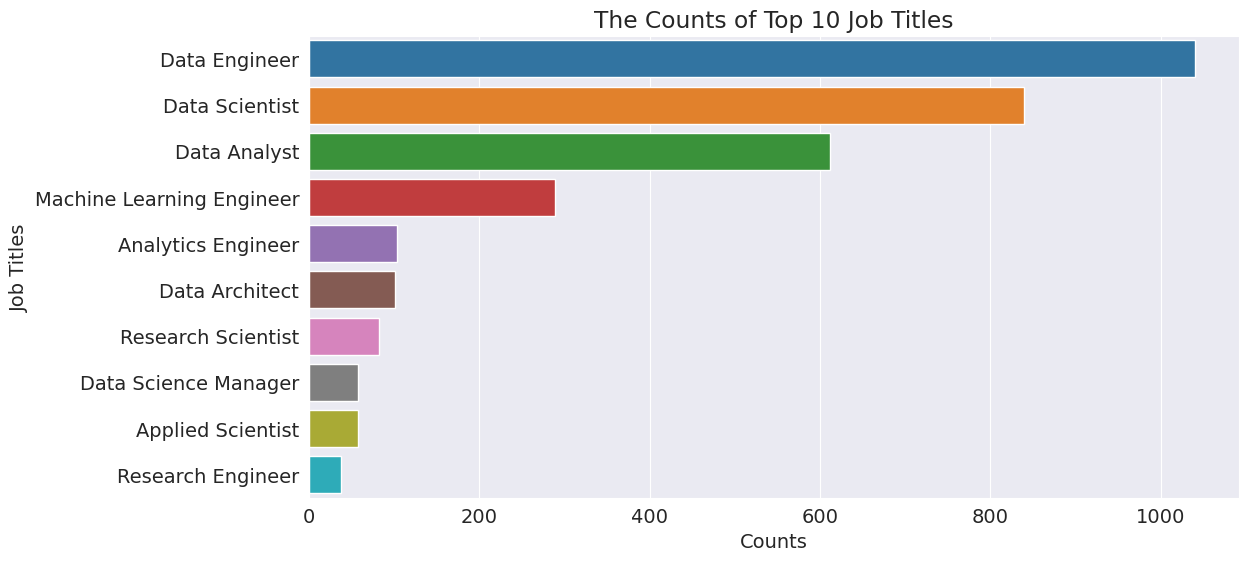

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=0)
plt.title("The Counts of Top 10 Job Titles")
plt.ylabel('Job Titles')
plt.xlabel('Counts')

sns.barplot(y=job_titles.index, x= job_titles.values);

### The 20 Job Titles in terms of Salary


In [ ]:
job_titles_salaries = data[['job_title','salary_in_usd']]


job_titles_salaries = job_titles_salaries.groupby(data['job_title']).mean().round(0).head(20).sort_values('salary_in_usd',ascending = False).reset_index()

/tmp/ipykernel_20/437546418.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  job_titles_salaries = job_titles_salaries.groupby(data['job_title']).mean().round(0).head(20).sort_values('salary_in_usd',ascending = False).reset_index()


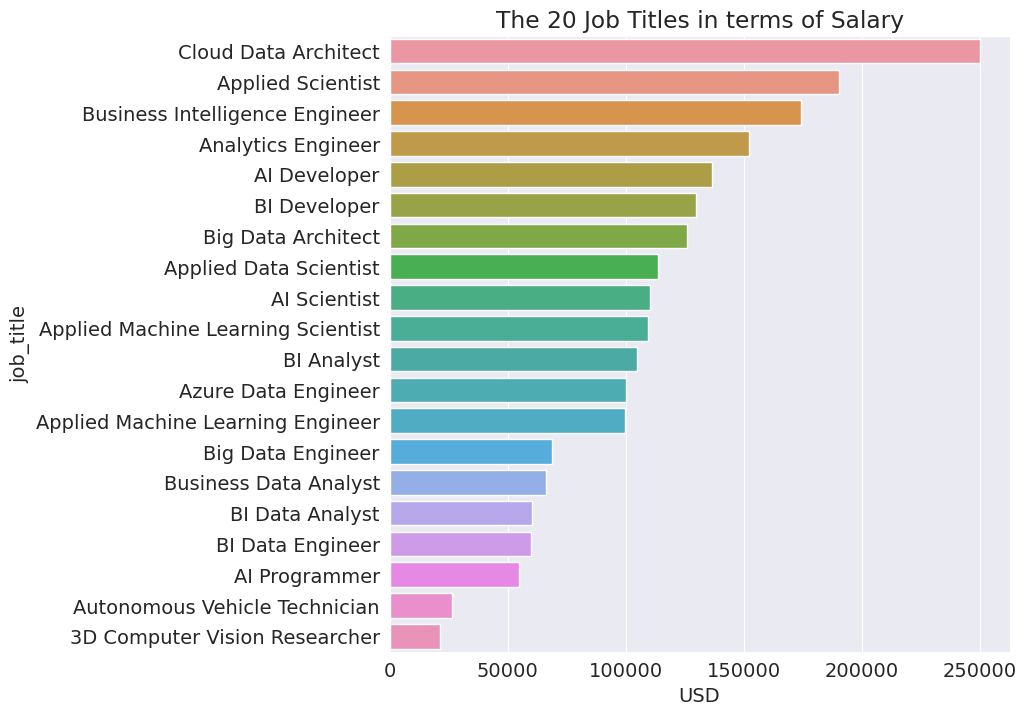

In [ ]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=0)
plt.title("The 20 Job Titles in terms of Salary")
plt.ylabel('Job Titles')
plt.xlabel('USD')

sns.barplot(data=job_titles_salaries,x=job_titles_salaries.salary_in_usd.values,y=job_titles_salaries.job_title);

### The Top 10 Countries have Data Science employees

In [ ]:
countries = data.employee_residence.value_counts().head(10)

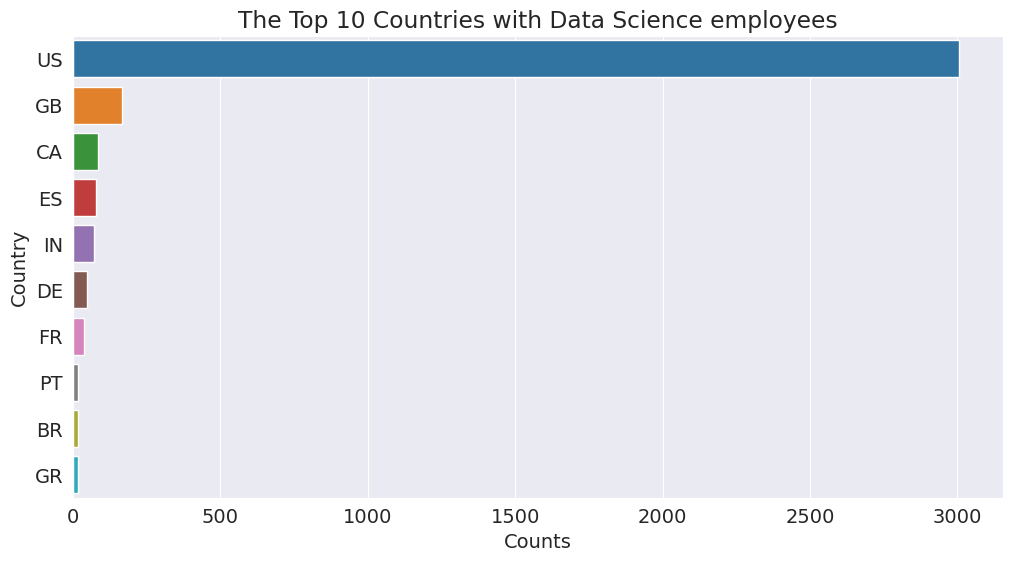

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=0)
plt.title("The Top 10 Countries with Data Science employees")
plt.ylabel('Country')
plt.xlabel('Counts')

sns.barplot(y=countries.index, x= countries.values);

it's clear that US has the largest number of emplyees in Data Science jobs

### Relationship between Experience Level and Company Size

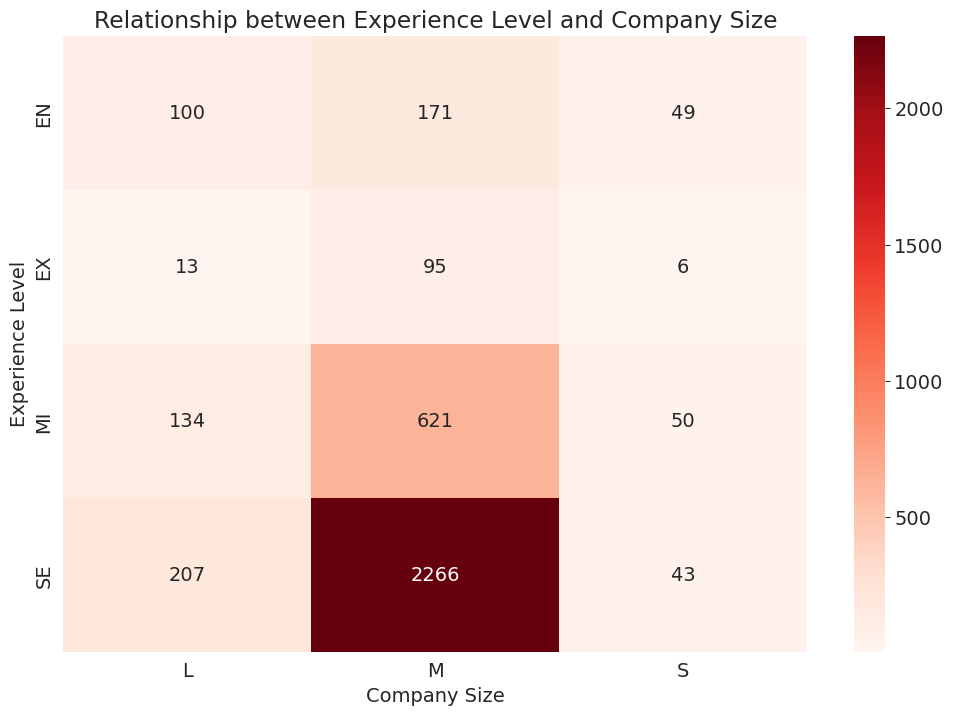

In [ ]:
cross_tab = pd.crosstab(data['experience_level'], data['company_size'])

# Create a heatmap using the cross-tabulation data
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap='Reds')

plt.xlabel('Company Size')
plt.ylabel('Experience Level')
plt.title('Relationship between Experience Level and Company Size');

## Asking and Answering Questions

#### Q1: How is it Clear from our dataset that Data Science is growing field over years?

In [ ]:
work_year = data.work_year.value_counts()
work_year

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

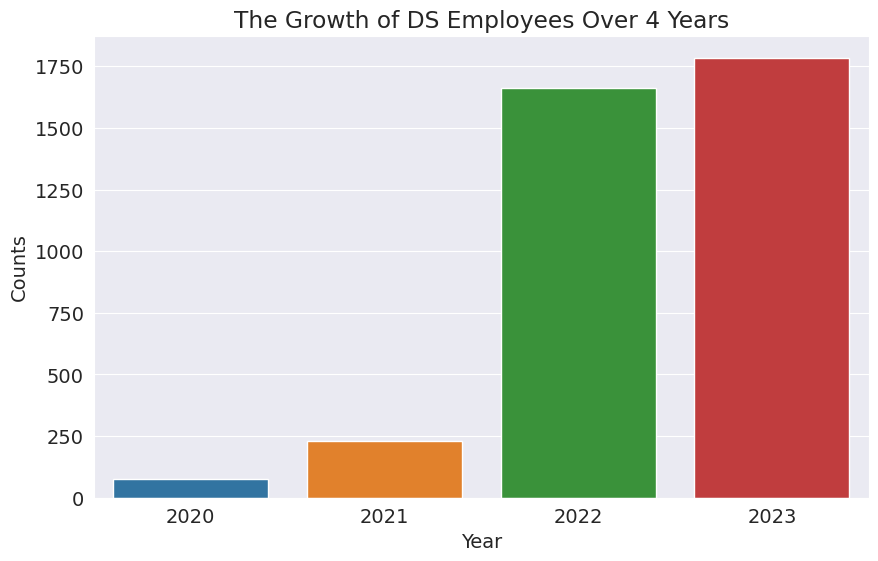

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=0)
plt.title("The Growth of DS Employees Over 4 Years")
plt.ylabel('Counts')
plt.xlabel('Year')

sns.barplot(y=work_year.values, x= work_year.index);

it is clear that the number of employees increases year after year

#### Q2: How to measure the growth of Data Scince employees in terms of Salaries?

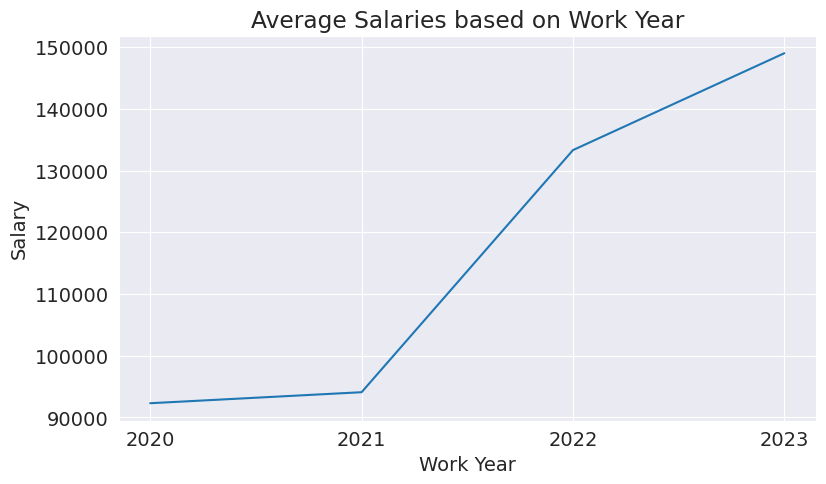

In [ ]:
year_salary=data['salary_in_usd'].groupby(data['work_year']).mean()

plt.title("Average Salaries based on Work Year")
plt.xlabel('Work Year')
plt.ylabel('Salary')
sns.lineplot(x=['2020', '2021', '2022','2023'],y=year_salary);

The Average salary of data scientist employee increases year by year which is answering the question.

#### Q3: how the level of experience  affect the salary?

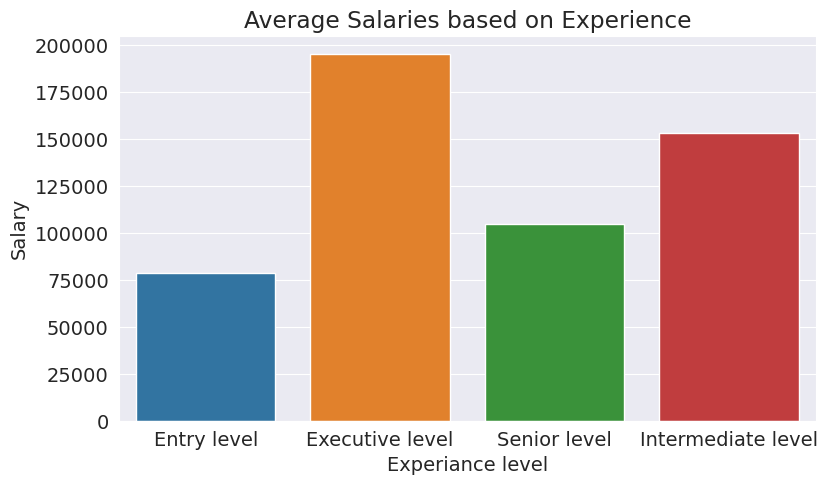

In [ ]:
exp_salary=data['salary_in_usd'].groupby(data['experience_level']).mean()

plt.title("Average Salaries based on Experience")
plt.xlabel('Experiance level')
plt.ylabel('Salary')
sns.barplot(x=['Entry level', 'Executive level', 'Senior level', 'Intermediate level'],y=exp_salary.values);

The ascending order of average salaries based on Experience level: Entry level, Senior level, Intermediate level, Executive level

#### Q4: What is the order of employment types in terms of salary?

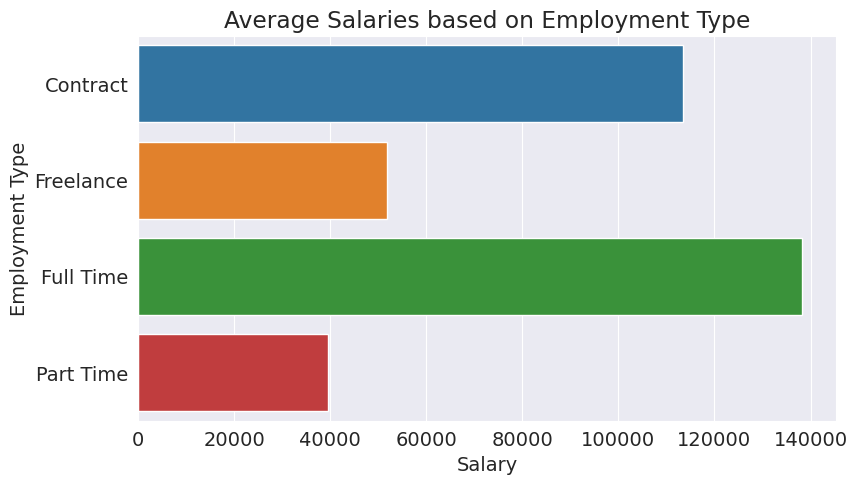

In [ ]:
data['salary_in_usd'].groupby(data['employment_type']).mean()

employ_type_salary=data['salary_in_usd'].groupby(data['employment_type']).mean()
plt.title("Average Salaries based on Employment Type")
plt.ylabel('Employment Type')
plt.xlabel('Salary')
sns.barplot(y=['Contract', 'Freelance', 'Full Time', 'Part Time'],x=employ_type_salary.values);

Of course the "full-time" type is the highest salary of the other types.

#### Q5: Sort the Countries which have the dominance in number of data science Companies.

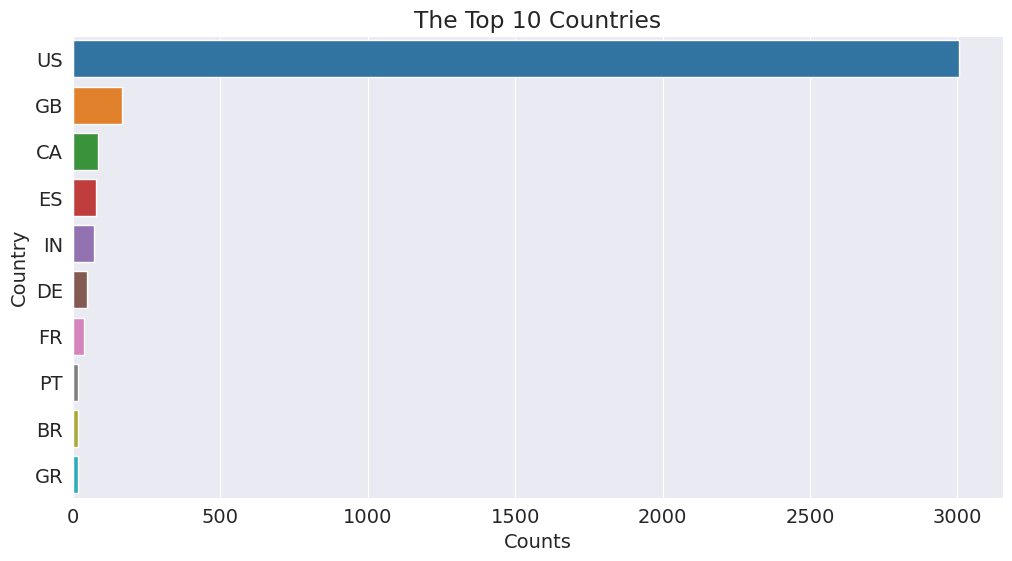

In [ ]:
countries = data.employee_residence.value_counts().head(10)

plt.figure(figsize=(12,6))
plt.xticks(rotation=0)
plt.title("The Top 10 Countries")
plt.ylabel('Country')
plt.xlabel('Counts')

sns.barplot(y=countries.index, x= countries.values);

The United States has the highest number of companies hiring data science employees

In [ ]:
profile = ProfileReport(data)
profile.to_widgets()

/usr/local/lib/python3.10/dist-packages/pandas_profiling/profile_report.py:457: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Conclusion


Data Science is one of the most in-demand and rapidly growing fields in the world. In this project, we covered the data science field salaries in detail. When we look the graphs, we can see that the popularity of data science continues

#TENSORFLOW

In [1]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=ec40b338b9df105864e13b4f48bd3c08eda16947b6b77665456668f088754de9
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

cols = ['experience_level', 'employment_type', 'job_title','salary_currency','employee_residence','company_location','company_size']
data[cols]=data[cols].apply(LabelEncoder().fit_transform)

# Create X, y
X = data.drop(["salary_in_usd"], axis=1)
y = data["salary_in_usd"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data.info()

NameError: ignored

In [ ]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1
